In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score, mean_absolute_error, confusion_matrix, ConfusionMatrixDisplay  
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
import lightgbm
from lightgbm import LGBMClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from rich import print

In [2]:
# df = pd.read_csv('C:\Users\EleNI\Desktop\NAsi\2\fraud_oracle.csv~')
from google.colab import files
uploaded = files.upload()


Saving fraud_oracle.csv to fraud_oracle.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['fraud_oracle.csv']))

In [4]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [5]:
df.shape

(15420, 33)

In [6]:
print(len(df.DriverRating)), print(len(df.Age))
df.NumberOfSuppliments.value_counts()

15420

15420

none           7047
more than 5    3867
1 to 2         2489
3 to 5         2017
Name: NumberOfSuppliments, dtype: int64

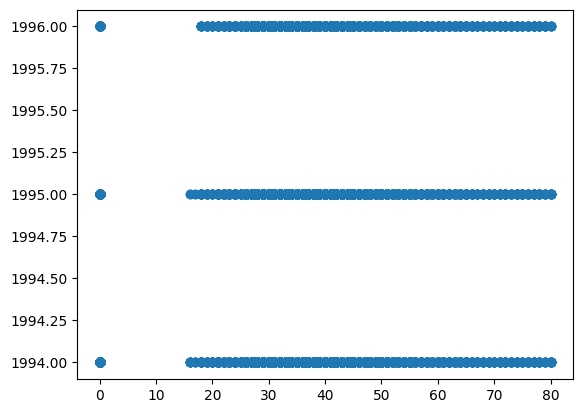

In [7]:
plt.scatter(df['Age'], df['Year'])

In [8]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.00,3.0,4.00,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.00,3.0,4.00,5.0
Age,15420.0,39.855707,13.492377,0.0,31.00,38.0,48.00,80.0
FraudFound_P,15420.0,0.059857,0.237230,0.0,0.00,0.0,0.00,1.0
PolicyNumber,15420.0,7710.500000,4451.514911,1.0,3855.75,7710.5,11565.25,15420.0
RepNumber,15420.0,8.483268,4.599948,1.0,5.00,8.0,12.00,16.0
Deductible,15420.0,407.704280,43.950998,300.0,400.00,400.0,400.00,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.00,2.0,3.00,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.00,1995.0,1996.00,1996.0


In [11]:
df.set_index('PolicyNumber')

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
PolicyNumber,,,,,,,,,,,,,,,,,,,,,
1,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
2,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
3,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
4,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
5,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15416,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15417,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15418,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision


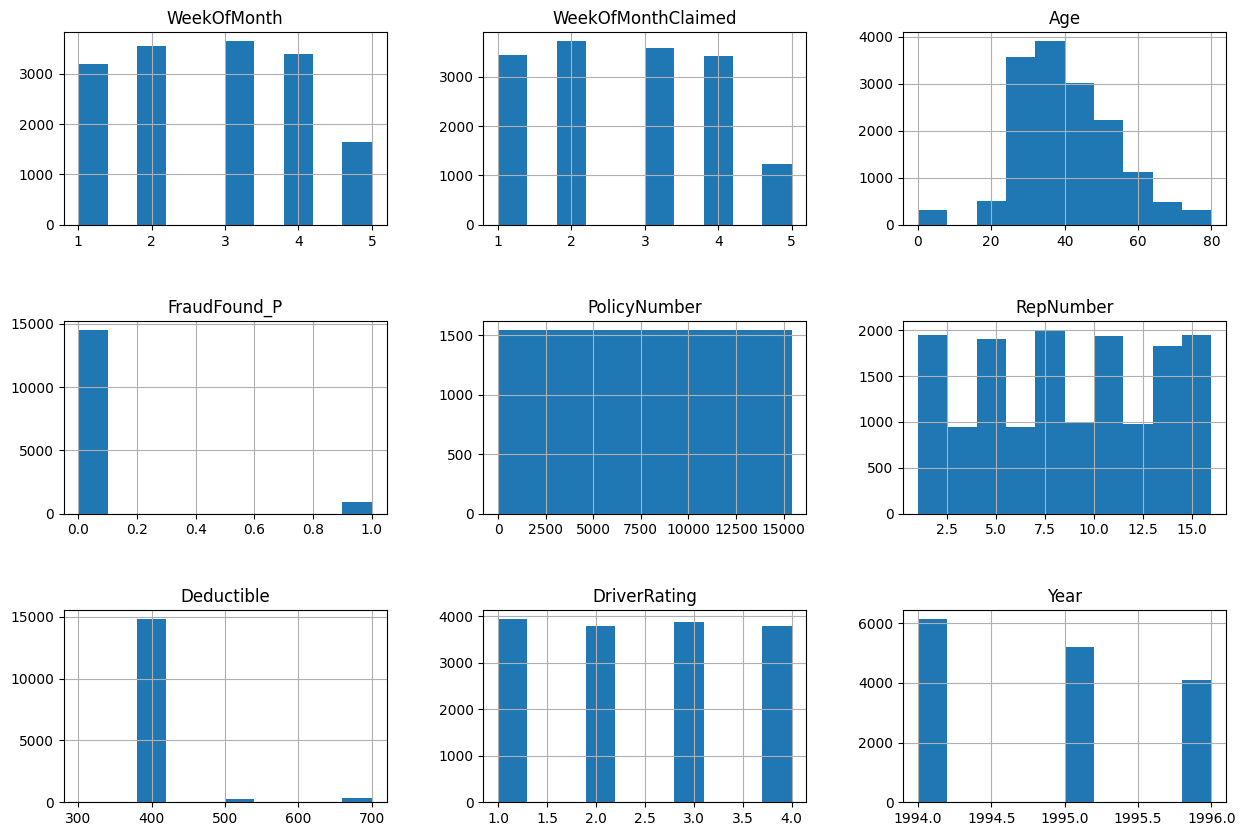

In [12]:
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

In [13]:
print("The number of non fraudster claims is: ",len(df[df['FraudFound_P'] == 0]))
print("The percentage of non fraudster claims is: {}% ".format(round((len(df[df['FraudFound_P'] == 0])/len(df['FraudFound_P'])),4)*100))     
print("----"*10)
print("The number of fraudster claims is: ",len(df[df['FraudFound_P'] == 1]))
print("The percentage of fraudster claims is: {}% ".format(round((len(df[df['FraudFound_P'] == 1])/len(df['FraudFound_P'])),4)*100))     
print("----"*10)
print("The number of total claims is: ",len(df['FraudFound_P']))

The number of non fraudster claims is:  14497

The percentage of non fraudster claims is: 94.01%

----------------------------------------

The number of fraudster claims is:  923

The percentage of fraudster claims is: 5.99%

----------------------------------------

The number of total claims is:  15420

In [14]:
item_counts = df['Month'].value_counts(normalize=True)
print("Percentage distribution among months")
print(round((item_counts*100),2))

Percentage distribution among months

Jan    9.15
May    8.87
Mar    8.82
Jun    8.57
Oct    8.46
Dec    8.33
Apr    8.30
Feb    8.21
Jul    8.15
Sep    8.04
Nov    7.79
Aug    7.31
Name: Month, dtype: float64

In [15]:
#Reframing MonthsName
df_month = df.groupby(['Month']).size().reset_index().rename(columns={0:'Num_accidents'})
df_month

,Month,Num_accidents
0,Apr,1280
1,Aug,1127
2,Dec,1285
3,Feb,1266
4,Jan,1411
5,Jul,1257
6,Jun,1321
7,Mar,1360
8,May,1367
9,Nov,1201


In [16]:
#Reframing the order of months' names
df['MonthName'] = pd.Categorical(df['Month'], ['Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

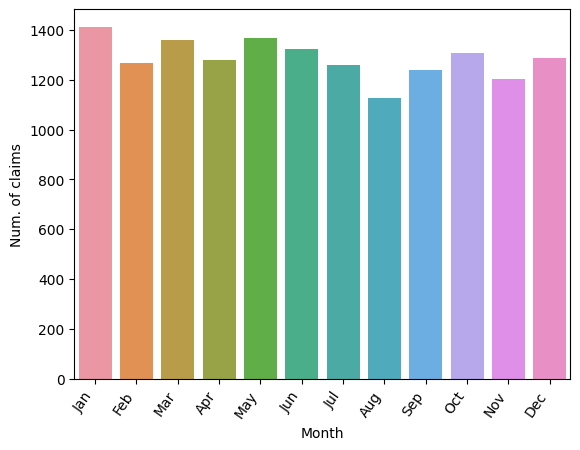

In [17]:
sns.countplot(data =df['Month'], x = df['MonthName'])
plt.xticks(rotation = 55, horizontalalignment='right')
plt.ylabel('Num. of claims')
plt.xlabel('Month')
plt.show()

In [18]:
df[['Month','FraudFound_P']].groupby(['Month','FraudFound_P']).size().reset_index()

,Month,FraudFound_P,0
0,Apr,0,1200
1,Apr,1,80
2,Aug,0,1043
3,Aug,1,84
4,Dec,0,1223
5,Dec,1,62
6,Feb,0,1184
7,Feb,1,82
8,Jan,0,1324
9,Jan,1,87


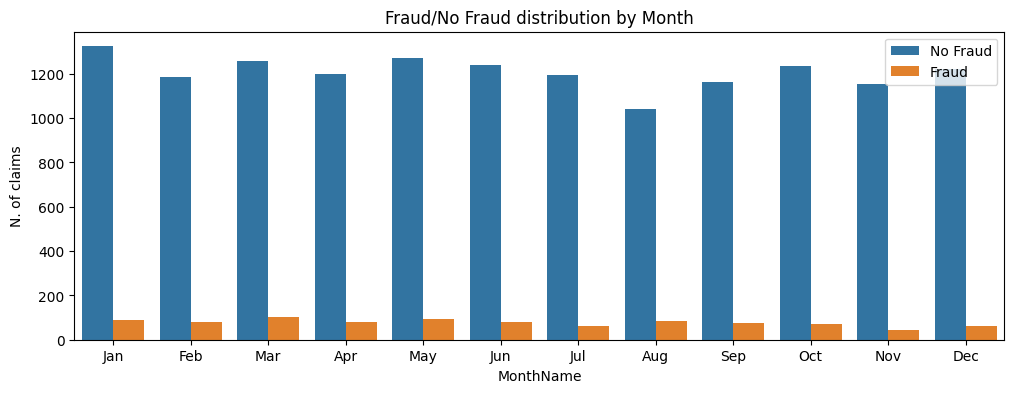

In [19]:
plt.figure(figsize=(12, 4))
labels = ['No Fraud', 'Fraud']
sns.countplot(x="MonthName", hue ='FraudFound_P', data=df)

plt.legend(labels)
plt.title('Fraud/No Fraud distribution by Month')

plt.ylabel('N. of claims')
plt.show()

In [20]:
Make = df['Make'].value_counts()
Make

Pontiac      3837
Toyota       3121
Honda        2801
Mazda        2354
Chevrolet    1681
Accura        472
Ford          450
VW            283
Dodge         109
Saab          108
Mercury        83
Saturn         58
Nisson         30
BMW            15
Jaguar          6
Porche          5
Mecedes         4
Ferrari         2
Lexus           1
Name: Make, dtype: int64

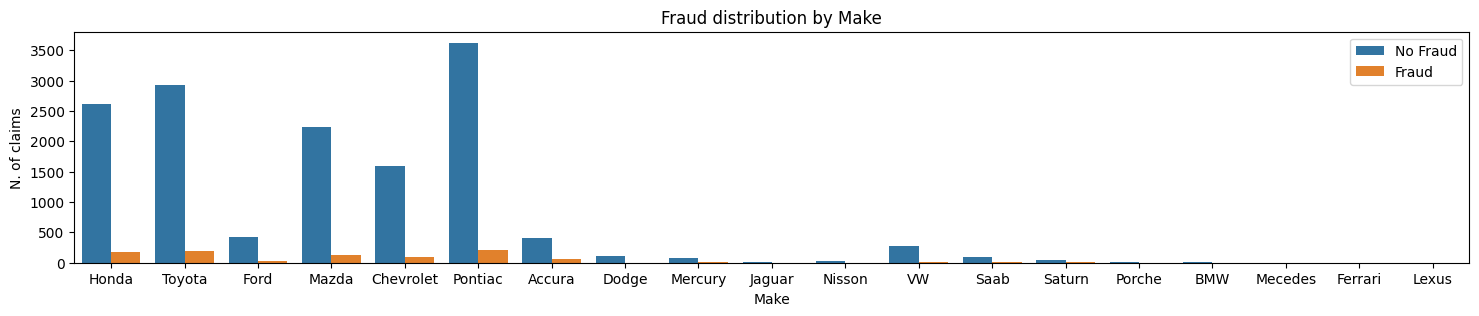

In [21]:
plt.figure(figsize=(18,3))

df_fraud = df.loc[df['FraudFound_P']==1]
df_no_fraud = df.loc[df['FraudFound_P']==0]

sns.countplot(x="Make" , hue = 'FraudFound_P', data= df)

labels = ['No Fraud', 'Fraud']
plt.legend(labels)
plt.title('Fraud distribution by Make')
plt.xlabel('Make')
plt.ylabel('N. of claims')
plt.show()

In [22]:
df['AccidentArea'].value_counts()

Urban    13822
Rural     1598
Name: AccidentArea, dtype: int64

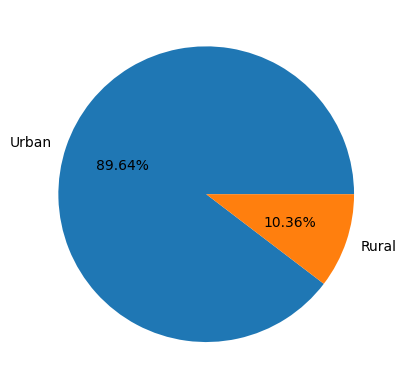

In [23]:
Accident_Area = df.AccidentArea.value_counts().values 
labels = ['Urban', 'Rural']
plt.pie(Accident_Area, labels = labels, autopct = '%1.2f%%')
plt.show()

In [24]:
cats = ['Rural', 'Urban']
df['AreaType'] = pd.Categorical(df['AccidentArea'], categories=cats, ordered=True)
df = df.sort_values('AreaType')

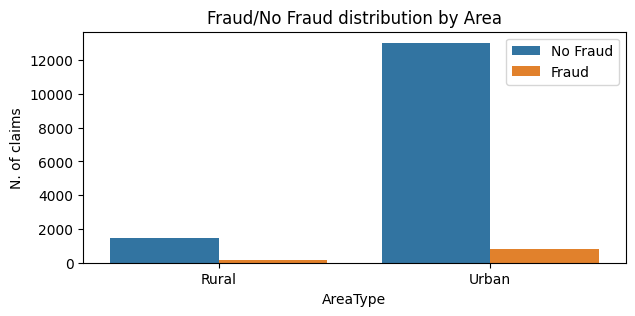

In [25]:
df_fraud = df.loc[df['FraudFound_P']==1]
df_no_fraud = df.loc[df['FraudFound_P']==0]
plt.figure(figsize=(7,3))
labels = ['No Fraud', 'Fraud']
sns.countplot(x="AreaType", hue ='FraudFound_P', data=df)


plt.legend(labels)
plt.title('Fraud/No Fraud distribution by Area')

plt.ylabel('N. of claims')
plt.show()

In [26]:
df['Sex'].value_counts()

Male      13000
Female     2420
Name: Sex, dtype: int64

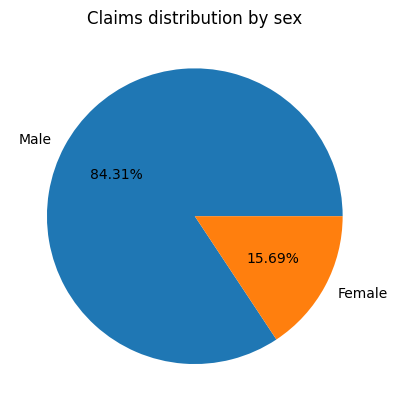

In [27]:
Sex = df['Sex'].value_counts() 
labels = ['Male','Female']
plt.pie(Sex,labels = labels, autopct = '%1.2f%%')
plt.title('Claims distribution by sex')
plt.show()

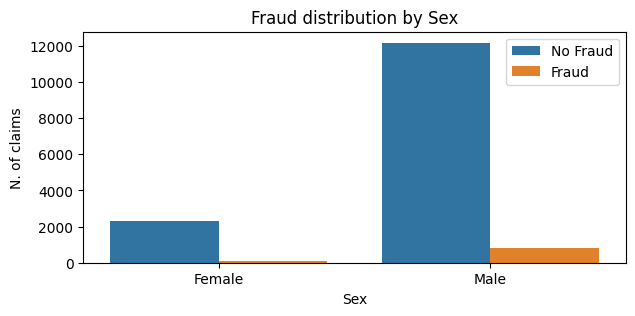

In [28]:
plt.figure(figsize=(7, 3))
labels = ['No Fraud', 'Fraud']
sns.countplot(x="Sex",hue="FraudFound_P" ,data=df)
plt.legend(labels)
plt.title('Fraud distribution by Sex')

plt.ylabel('N. of claims')
plt.show()

In [29]:
df[df.Sex=='Male']['FraudFound_P'].value_counts()

0    12182
1      818
Name: FraudFound_P, dtype: int64

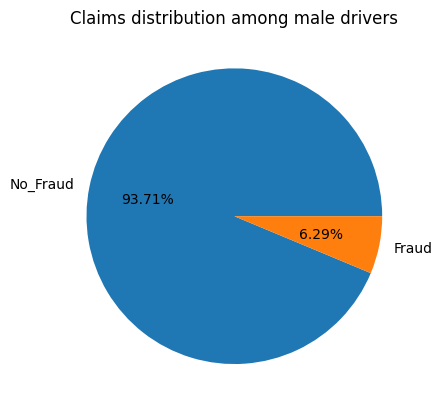

In [30]:
Male = df[df.Sex=='Male']['FraudFound_P'].value_counts() 
labels = ['No_Fraud','Fraud']
plt.pie(Male,labels = labels, autopct = '%1.2f%%')
plt.title('Claims distribution among male drivers')
plt.show()

In [31]:
df[df.Sex=='Female']['FraudFound_P'].value_counts()

0    2315
1     105
Name: FraudFound_P, dtype: int64

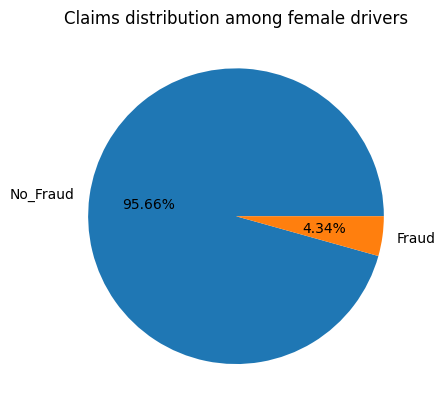

In [32]:
Female = df[df.Sex=='Female']['FraudFound_P'].value_counts() 
labels = ['No_Fraud','Fraud']
plt.pie(Female,labels = labels, autopct = '%1.2f%%')
plt.title('Claims distribution among female drivers')
plt.show()

In [33]:
df[df['Age']<=15].count()

Month                   320
WeekOfMonth             320
DayOfWeek               320
Make                    320
AccidentArea            320
DayOfWeekClaimed        320
MonthClaimed            320
WeekOfMonthClaimed      320
Sex                     320
MaritalStatus           320
Age                     320
Fault                   320
PolicyType              320
VehicleCategory         320
VehiclePrice            320
FraudFound_P            320
PolicyNumber            320
RepNumber               320
Deductible              320
DriverRating            320
Days_Policy_Accident    320
Days_Policy_Claim       320
PastNumberOfClaims      320
AgeOfVehicle            320
AgeOfPolicyHolder       320
PoliceReportFiled       320
WitnessPresent          320
AgentType               320
NumberOfSuppliments     320
AddressChange_Claim     320
NumberOfCars            320
Year                    320
BasePolicy              320
MonthName               320
AreaType                320
dtype: int64

In [34]:
df = df[df['Age']>15]

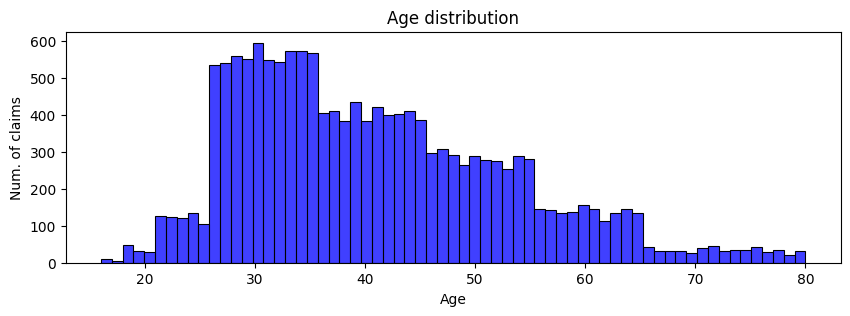

In [35]:
plt.figure(figsize=(10,3))
sns.histplot(data = df, x = 'Age', color = 'blue', bins =65 )
#plt.legend(["No Fraud", "Fraud"])
plt.ylabel("Num. of claims")
plt.title('Age distribution')

plt.show()

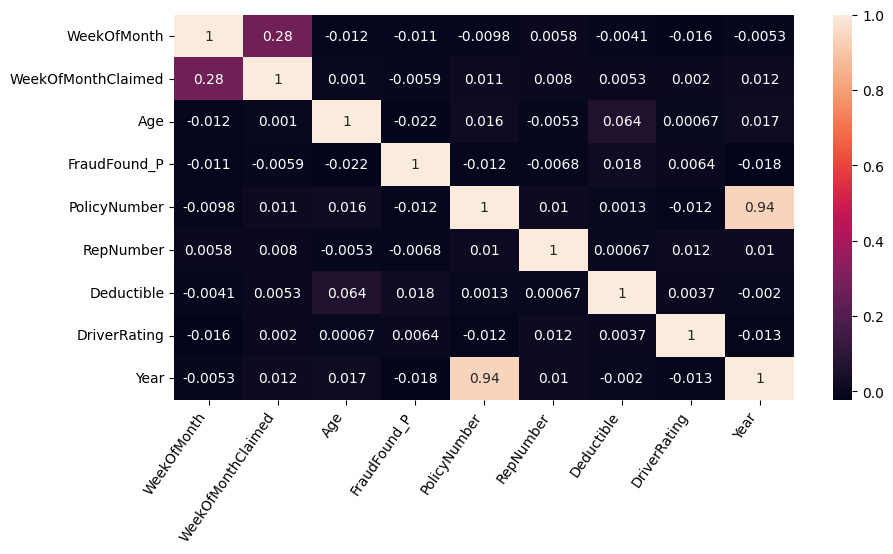

In [36]:
df.corr()
plt.figure(figsize=(10,5))
dataplot = sns.heatmap(df.corr(), annot=True)
plt.xticks(rotation = 55, horizontalalignment='right')
plt.show()

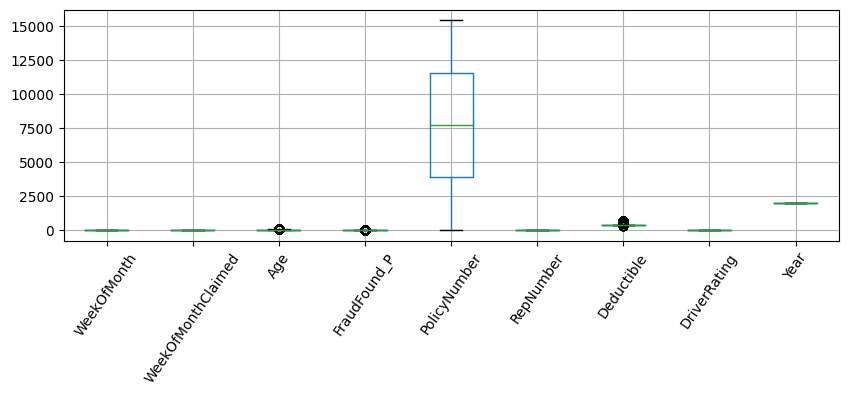

In [37]:
df.boxplot(figsize=(10,3))
plt.xticks(rotation = 55)
plt.show()

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15100 entries, 7709 to 15419
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Month                 15100 non-null  object  
 1   WeekOfMonth           15100 non-null  int64   
 2   DayOfWeek             15100 non-null  object  
 3   Make                  15100 non-null  object  
 4   AccidentArea          15100 non-null  object  
 5   DayOfWeekClaimed      15100 non-null  object  
 6   MonthClaimed          15100 non-null  object  
 7   WeekOfMonthClaimed    15100 non-null  int64   
 8   Sex                   15100 non-null  object  
 9   MaritalStatus         15100 non-null  object  
 10  Age                   15100 non-null  int64   
 11  Fault                 15100 non-null  object  
 12  PolicyType            15100 non-null  object  
 13  VehicleCategory       15100 non-null  object  
 14  VehiclePrice          15100 non-null  object  
 15 

In [39]:
object_type_feature = []

for features in df.columns:
    if df[features].dtype == 'O':
       object_type_feature.append(features)

print(object_type_feature)

[
    'Month',
    'DayOfWeek',
    'Make',
    'AccidentArea',
    'DayOfWeekClaimed',
    'MonthClaimed',
    'Sex',
    'MaritalStatus',
    'Fault',
    'PolicyType',
    'VehicleCategory',
    'VehiclePrice',
    'Days_Policy_Accident',
    'Days_Policy_Claim',
    'PastNumberOfClaims',
    'AgeOfVehicle',
    'AgeOfPolicyHolder',
    'PoliceReportFiled',
    'WitnessPresent',
    'AgentType',
    'NumberOfSuppliments',
    'AddressChange_Claim',
    'NumberOfCars',
    'BasePolicy'
]

In [40]:
print(len(object_type_feature))

24

In [41]:
df.groupby('VehicleCategory').size().sort_values()

VehicleCategory
Utility     382
Sport      5208
Sedan      9510
dtype: int64

In [42]:
df[['Month']] = df[['Month']].replace( {
    'Jan' : 0,
    'Feb' : 1,
    'Mar' :2,
    'Apr' : 3,
    'May': 4, 
    'Jun': 5,
    'Jul': 6,
    'Aug' : 7,
    'Sep': 8,
    'Oct' : 9,
    'Nov' : 10,
    'Dec' : 11
    })


df[['DayOfWeek']] = df[['DayOfWeek']].replace( {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4, 
    'Saturday': 5,
    'Sunday' : 6
    })


df[['Make']] = df[['Make']].replace( {
    'Lexus': 0,
    'Ferrari': 1, 
    'Mecedes': 2,
    'Porche': 3,
    'Jaguar': 4,
    'BMW': 5,            
    'Nisson': 6,
    'Saturn': 7,
    'Mercury':8,
    'Dodge' : 9,
    'Saab' : 10,
    'VW' : 11,
    'Ford': 12,
    'Accura': 13,
    'Chevrolet': 14,
    'Mazda' : 15,
    'Honda' : 16,
    'Toyota' : 17,
    'Pontiac': 18
    })     

df[['AccidentArea']] = df[['AccidentArea']].replace( {
    'Rural' : 0,
    'Urban' : 1
    })


df[['DayOfWeekClaimed']] = df[['DayOfWeekClaimed']].replace( {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4, 
    'Saturday': 5,
    'Sunday' : 6
    })


df[['MonthClaimed']] = df[['MonthClaimed']].replace( {
    'Jan' : 0,
    'Feb' : 1,
    'Mar' :2,
    'Apr' : 3,
    'May': 4, 
    'Jun': 5,
    'Jul': 6,
    'Aug' : 7,
    'Sep': 8,
    'Oct' : 9,
    'Nov' : 10,
    'Dec' : 11
    })


df[['Sex']] = df[['Sex']].replace( {
    'Female' : 0,
    'Male' : 1
    })
    

df[['MaritalStatus']] = df[['MaritalStatus']].replace( {
    'Widow' : 0,
    'Divorced' : 1,
    'Single' : 2,    
    'Married' : 3
    })


df[['Fault']] = df[['Fault']].replace( {
    'Third Party' : 0,
    'Policy Holder' : 1
    })


df[['PolicyType']] = df[['PolicyType']].replace( {
    'Sport - Liability' : 0,
    'Sport - All Perils' : 1,
    'Utility - Liability' : 2,
    'Utility - Collision' :3,
    'Utility - All Perils' :4,
    'Sport - Collision' : 5,
    'Sedan - All Perils' : 6 ,
    'Sedan - Liability' : 7,
    'Sedan - Collision' : 8
    })


df[['VehicleCategory']] = df[['VehicleCategory']].replace( {
    'Utility' : 0,
    'Sport' : 1, 
    'Sedan' : 2
    })
    

df[['VehiclePrice']] = df[['VehiclePrice']].replace( {
    'less than 20000' : 0,
    '20000 to 29000': 1,
    '30000 to 39000': 2,
    '40000 to 59000': 3,
    '60000 to 69000' : 4,
    'more than 69000' : 5
    })  
  

df[['Days_Policy_Accident']] = df[['Days_Policy_Accident']].replace( {
    'none' : 0,
    '1 to 7' : 1,
    '8 to 15' : 2,
    '15 to 30' :3,
    'more than 30' :4
    })


df[['Days_Policy_Claim']] = df[['Days_Policy_Claim']].replace( {
    '8 to 15' : 0,
    '15 to 30' : 1,
    'more than 30' : 2
    })


df[['PastNumberOfClaims']] = df[['PastNumberOfClaims']].replace( {
    'none': 0,
    '1': 1,
    '2 to 4': 2,
    'more than 4': 3
    })


df[['AgeOfVehicle']] = df[['AgeOfVehicle']].replace({
    'new' : 0,
    '2 years' : 1,
    '3 years' : 2,
    '4 years' : 3,
    '5 years' : 4, 
    '6 years' : 5,
    '7 years' : 6,      
    'more than 7' : 7
    })


df[['AgeOfPolicyHolder']] = df[['AgeOfPolicyHolder']].replace({
    '18 to 20' : 0,  
    '21 to 25' : 1,
    '26 to 30' : 2,
    '31 to 35' : 3,
    '36 to 40' : 4,
    '41 to 50' : 5,
    '51 to 65' : 6, 
    'over 65' : 7
    })


df[['PoliceReportFiled']] = df[['PoliceReportFiled']].replace({
    'Yes' : 0,
    'No' : 1
    })


df[['WitnessPresent']] = df[['WitnessPresent']].replace({
    'Yes' : 0,
    'No' : 1
    })


df[['AgentType']] = df[['AgentType']].replace({
    'Internal' : 0,
    'External' : 1
    })


df[['NumberOfSuppliments']] = df[['NumberOfSuppliments']].replace({
    'none' : 0,
    '1 to 2' : 1,
    '3 to 5' : 2,
    'more than 5' : 3
    })


df[['AddressChange_Claim']] = df[['AddressChange_Claim']].replace({
    'no change' : 0,
    'under 6 months' : 1,
    '1 year' : 2,
    '2 to 3 years' : 3,
    '4 to 8 years' : 4
    })
    
    
df[['NumberOfCars']] = df[['NumberOfCars']].replace({
    '1 vehicle' : 0,
    '2 vehicles' : 1,
    '3 to 4' : 2,
    '5 to 8' : 3,
    'more than 8' : 4
    })


df[['BasePolicy']] = df[['BasePolicy']].replace({
    'All Perils' : 0, 
    'Liability' : 1,
    'Collision' : 2 
    })
    
    
df[['MonthName']] = df[['MonthName']].replace( {
    'Jan' : 0,
    'Feb' : 1,
    'Mar' :2,
    'Apr' : 3,
    'May': 4, 
    'Jun': 5,
    'Jul': 6,
    'Aug' : 7,
    'Sep': 8,
    'Oct' : 9,
    'Nov' : 10,
    'Dec' : 11
    })

df[['AreaType']] = df[['AreaType']].replace( {
    'Rural' : 0,
    'Urban' : 1
    })

In [43]:
df.head(10)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,MonthName,AreaType
7709,10,2,1,16,0,3,10,3,0,2,...,1,1,1,3,0,0,1995,0,10,0
6322,3,4,0,15,0,2,5,2,1,3,...,1,1,1,0,0,0,1995,0,3,0
9758,1,3,0,13,0,1,1,4,1,3,...,1,1,1,3,0,2,1995,1,1,0
13386,10,2,5,16,0,1,10,3,1,2,...,1,1,1,0,0,0,1996,2,10,0
13385,10,3,2,17,0,3,10,3,0,3,...,1,1,1,3,0,0,1996,2,10,0
9768,8,3,0,15,0,3,8,4,1,2,...,1,1,1,3,0,0,1995,1,8,0
13381,8,3,4,14,0,4,8,4,1,3,...,1,1,1,1,0,0,1996,1,8,0
6331,8,2,0,15,0,4,8,3,1,3,...,0,1,1,0,0,0,1995,2,8,0
2280,7,3,5,15,0,0,7,4,0,3,...,1,1,1,0,0,0,1994,2,7,0
13379,5,3,4,12,0,0,5,3,1,3,...,1,1,1,0,0,0,1996,2,5,0


In [44]:
X = df.drop(columns = 'FraudFound_P', axis = 1)
Y = df.FraudFound_P

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)
X_train.shape, X_test.shape, X.shape

((10570, 34), (4530, 34), (15100, 34))

In [65]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# Ranfom Forest hypeparameter tning
param_grid = {
	'n_estimators': [25, 50, 100, 150, 200],
	'max_features': ['sqrt', 'log2', None],
	'max_depth': [3, 6, 7, 9],
	'max_leaf_nodes': [3, 6, 7, 9, 12],}

grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)
grid_search.fit(X_train, Y_train)
print(grid_search.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid_search.best_estimator_)

{'max_depth': 7, 'max_features': None, 'max_leaf_nodes': 12, 'n_estimators': 25}

RandomForestClassifier(max_depth=7, max_features=None, max_leaf_nodes=12,
                       n_estimators=25)

In [66]:
#SVM hyperparameter tuning
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, Y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.502 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.502 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.502 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.502 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.500 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

SVC(C=100, gamma=0.0001)

In [49]:
print('LGBM')


max_depth = 80

X = X.astype(float) 
Y =Y.astype(float)
X_train = X_train.astype(float)
X_test = X_test.astype(float)
Y_train = Y_train.astype(float)
Y_test = Y_test.astype(float)

model_lgbm = lightgbm.LGBMClassifier(num_leaves = 5,  min_data_in_leaf = 19 ,max_depth = max_depth)
model_lgbm.fit(X_train,
               Y_train)

X_train_prediction_1 = model_lgbm.predict(X_train)
train_data_accuracy_1 = accuracy_score(X_train_prediction_1, Y_train)
print('The training set accuracy is: ',train_data_accuracy_1)

X_test_prediction_1 = model_lgbm.predict(X_test)
test_data_accuracy_1 = accuracy_score(X_test_prediction_1, Y_test )
print('The test set accuracy is: ',test_data_accuracy_1)



print("                               ")
print("Prediction on the whole dataset")
print("                               ")

prediction_lgbm = model_lgbm.predict(X)
accuracy_lgbm = accuracy_score(prediction_lgbm, Y )
print('The whole dataset accuracy is: ',accuracy_lgbm)




print('                                                            ')
print('------------------------------------------------------------')
print('                                                            ')
############################################################

print('Logistic Regression')

model_lr = LogisticRegression()
model_lr.fit(X_train, Y_train)

X_train_prediction_2 = model_lr.predict(X_train)
train_data_accuracy_2 = accuracy_score(X_train_prediction_2, Y_train)
print('The training set accuracy is: ',train_data_accuracy_2)

X_test_prediction_2 = model_lr.predict(X_test)
test_data_accuracy_2 = accuracy_score(X_test_prediction_2, Y_test )
print('The test set accuracy is: ',test_data_accuracy_2)


print("                               ")
print("Prediction on the whole dataset")
print("                               ")

prediction_lr = model_lr.predict(X)
accuracy_lr = accuracy_score(prediction_lr, Y )
print('The whole dataset accuracy is: ',accuracy_lr)

print('                                                            ')
print('------------------------------------------------------------')
print('                                                            ')
############################################################

print('Random Forest')


model_rf = RandomForestClassifier(criterion = 'gini', n_estimators = 200 ,max_features = 'sqrt', max_depth = 7, random_state = 42)
model_rf.fit(X_train, Y_train)

X_train_prediction_3 = model_rf.predict(X_train)
train_data_accuracy_3 = accuracy_score(X_train_prediction_3, Y_train)
print('The training set accuracy is: ',train_data_accuracy_3)

X_test_prediction_3 = model_rf.predict(X_test)
test_data_accuracy_3 = accuracy_score(X_test_prediction_3, Y_test )
print('The test set accuracy is: ',test_data_accuracy_3)


print("                               ")
print("Prediction on the whole dataset")
print("                               ")

prediction_rf = model_rf.predict(X)
accuracy_rf = accuracy_score(prediction_rf, Y )
print('The whole dataset accuracy is: ',accuracy_rf)


print('                                                            ')
print('------------------------------------------------------------')
print('                                                            ')
############################################################

print('Random Forest with hyperparameter tuning')

model_rfH = RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=9, n_estimators=25)

model_rfH.fit(X_train, Y_train)

X_train_prediction_16 = model_rfH.predict(X_train)
train_data_accuracy_16 = accuracy_score(X_train_prediction_16, Y_train)
print('The training set accuracy is: ',train_data_accuracy_16)

X_test_prediction_16 = model_rfH.predict(X_test)
test_data_accuracy_16 = accuracy_score(X_test_prediction_16, Y_test )
print('The test set accuracy is: ',test_data_accuracy_16)


print("                               ")
print("Prediction on the whole dataset")
print("                               ")

prediction_rfH = model_rfH.predict(X)
accuracy_rfH = accuracy_score(prediction_rfH, Y )
print('The whole dataset accuracy is: ',accuracy_rfH)


print('                                                            ')
print('------------------------------------------------------------')
print('                                                            ')
############################################################

print('XGBoost')


model_xgb = XGBClassifier(max_depth = 16,min_child_weight = 3, gamma =  7)
model_xgb.fit(X_train,
               Y_train)

X_train_prediction_4 = model_xgb.predict(X_train)
train_data_accuracy_4 = accuracy_score(X_train_prediction_4, Y_train)
print('The training set accuracy is: ',train_data_accuracy_4)

X_test_prediction_4 = model_xgb.predict(X_test)
test_data_accuracy_4 = accuracy_score(X_test_prediction_4, Y_test )
print('The test set accuracy is: ',test_data_accuracy_4)



print("                               ")
print("Prediction on the whole dataset")
print("                               ")

prediction_xgb = model_xgb.predict(X)
accuracy_xgb = accuracy_score(prediction_xgb, Y )
print('The whole dataset accuracy is: ',accuracy_xgb)

print('                                                            ')
print('------------------------------------------------------------')
print('                                                            ')
############################################################


print('Decision Tree (Entropy)')

model_dcEntropy = DecisionTreeClassifier(criterion = "entropy", random_state = 200, max_depth=7, min_samples_leaf=9)
model_dcEntropy.fit(X_train, Y_train)


X_train_prediction_5 = model_dcEntropy.predict(X_train)
train_data_accuracy_5 = accuracy_score(X_train_prediction_5, Y_train)
print('The training set accuracy is: ',train_data_accuracy_5)

X_test_prediction_5 = model_dcEntropy.predict(X_test)
test_data_accuracy_5 = accuracy_score(X_test_prediction_5, Y_test )
print('The test set accuracy is: ',test_data_accuracy_5)


print("                               ")
print("Prediction on the whole dataset")
print("                               ")

prediction_dcEntropy = model_dcEntropy.predict(X)
accuracy_dcEntropy = accuracy_score(prediction_dcEntropy, Y )
print('The whole dataset accuracy is: ',accuracy_dcEntropy)


print('                                                            ')
print('------------------------------------------------------------')
print('                                                            ')
############################################################


print('Decision Tree (Gini)')

model_dcGini = DecisionTreeClassifier(criterion = "gini", random_state = 200, max_depth=7, min_samples_leaf=9)
model_dcGini.fit(X_train, Y_train)



X_train_prediction_6 = model_dcGini.predict(X_train)
train_data_accuracy_6 = accuracy_score(X_train_prediction_6, Y_train)
print('The training set accuracy is: ',train_data_accuracy_6)

X_test_prediction_6 = model_dcGini.predict(X_test)
test_data_accuracy_6 = accuracy_score(X_test_prediction_6, Y_test )
print('The test set accuracy is: ',test_data_accuracy_6)

print("                               ")
print("Prediction on the whole dataset")
print("                               ")

prediction_dcGini = model_dcGini.predict(X)
accuracy_dcGini = accuracy_score(prediction_dcGini, Y )
print('The whole dataset accuracy is: ',accuracy_dcGini)


print('                                                            ')
print('------------------------------------------------------------')
print('                                                            ')
############################################################

print('Support Vector Machine')

kernels = ('linear', 'poly', 'rbf', 'sigmoid')


for kernel in kernels:
    print('SVM kernel =', kernel)
    model_svm = SVC(kernel=kernel)
    model_svm.fit(X_train, Y_train)

    X_train_prediction_7 = model_svm.predict(X_train)
    train_data_accuracy_7 = accuracy_score(X_train_prediction_7, Y_train)
    print('The training set accuracy is: ',train_data_accuracy_7)

    X_test_prediction_7 = model_svm.predict(X_test)
    test_data_accuracy_7 = accuracy_score(X_test_prediction_7, Y_test )
    print('The test set accuracy is: ',test_data_accuracy_7)

    X_train_prediction_7 = model_svm.predict(X_train)
    train_data_accuracy_7 = accuracy_score(X_train_prediction_7, Y_train)
    print('The training set accuracy is: ',train_data_accuracy_7)

    X_test_prediction_7 = model_svm.predict(X_test)
    test_data_accuracy_7 = accuracy_score(X_test_prediction_7, Y_test )
    print('The test set accuracy is: ',test_data_accuracy_7)

    print("                               ")
    print("Prediction on the whole dataset")
    print("                               ")

    prediction_svm = model_svm.predict(X)
    accuracy_svm = accuracy_score(prediction_svm, Y )
    print('The whole dataset accuracy is: ',accuracy_svm)
    
    # printing out accuracy score for each kernel:
    # print("\nKernel {}".format(kernel))
    # print("Accuracy = {}\n".format(accuracy_svm))
    # print('************************************')
    # print("SVM MAE: ",mean_absolute_error(Y, prediction_svm))
    # print("--------------------------SVM : --------------------------", kernel)
    # print(classification_report(Y_test, X_test_prediction_7))


print('                                                            ')
print('------------------------------------------------------------')
print('                                                            ')
############################################################

print('Support Vector Machine with Hyperparameter tuning')


model_svmH = SVC(C=1, gamma=0.001, kernel='rbf')
model_svmH.fit(X_train, Y_train)

X_train_prediction_17 = model_svmH.predict(X_train)
train_data_accuracy_17 = accuracy_score(X_train_prediction_17, Y_train)
print('The training set accuracy is: ',train_data_accuracy_17)

X_test_prediction_17 = model_svmH.predict(X_test)
test_data_accuracy_17 = accuracy_score(X_test_prediction_17, Y_test )
print('The test set accuracy is: ',test_data_accuracy_17)

X_train_prediction_17 = model_svmH.predict(X_train)
train_data_accuracy_17 = accuracy_score(X_train_prediction_17, Y_train)
print('The training set accuracy is: ',train_data_accuracy_17)

X_test_prediction_17 = model_svmH.predict(X_test)
test_data_accuracy_17 = accuracy_score(X_test_prediction_17, Y_test )
print('The test set accuracy is: ',test_data_accuracy_17)

print("                               ")
print("Prediction on the whole dataset")
print("                               ")

prediction_svmH = model_svmH.predict(X)
accuracy_svmH = accuracy_score(prediction_svmH, Y )
print('The whole dataset accuracy is: ',accuracy_svmH)


    
print('                                                            ')
print('------------------------------------------------------------')
print('                                                            ')
############################################################

print('Naive Bayes GaussianNB')

model_nbGauss = GaussianNB()
model_nbGauss.fit(X_train, Y_train)



X_train_prediction_8 = model_nbGauss.predict(X_train)
train_data_accuracy_8 = accuracy_score(X_train_prediction_8, Y_train)
print('The training set accuracy is: ',train_data_accuracy_8)

X_test_prediction_8 = model_nbGauss.predict(X_test)
test_data_accuracy_8 = accuracy_score(X_test_prediction_8, Y_test )
print('The test set accuracy is: ',test_data_accuracy_8)

#I try the model on the whole dataset
print("                               ")
print("Prediction on the whole dataset")
print("                               ")

prediction_nbGauss = model_nbGauss.predict(X)
accuracy_nbGauss = accuracy_score(prediction_nbGauss, Y )
print('The whole dataset accuracy is: ',accuracy_nbGauss)


print('                                                            ')
print('------------------------------------------------------------')
print('                                                            ')
############################################################

print('Naive Bayes ComplementNB')

model_nbComp = ComplementNB(alpha=0.0001)
model_nbComp.fit(X_train, Y_train)



X_train_prediction_10 = model_nbComp.predict(X_train)
train_data_accuracy_10 = accuracy_score(X_train_prediction_10, Y_train)
print('The training set accuracy is: ',train_data_accuracy_10)

X_test_prediction_10 = model_nbComp.predict(X_test)
test_data_accuracy_10 = accuracy_score(X_test_prediction_10, Y_test )
print('The test set accuracy is: ',test_data_accuracy_10)

#I try the model on the whole dataset
print("                               ")
print("Prediction on the whole dataset")
print("                               ")

prediction_nbComp = model_nbComp.predict(X)
accuracy_nbComp = accuracy_score(prediction_nbComp, Y )
print('The whole dataset accuracy is: ',accuracy_nbComp)


print('                                                            ')
print('------------------------------------------------------------')
print('                                                            ')
############################################################


print('k-nearest neighbors')

model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, Y_train)


X_train_prediction_12 = model_knn.predict(X_train)
train_data_accuracy_12 = accuracy_score(X_train_prediction_12, Y_train)
print('The training set accuracy is: ',train_data_accuracy_12)

X_test_prediction_12 = model_knn.predict(X_test)
test_data_accuracy_12 = accuracy_score(X_test_prediction_12, Y_test )
print('The test set accuracy is: ',test_data_accuracy_12)

print("                               ")
print("Prediction on the whole dataset")
print("                               ")

prediction_knn = model_knn.predict(X)
accuracy_knn = accuracy_score(prediction_knn, Y )
print('The whole dataset accuracy is: ',accuracy_knn)


print('                                                            ')
print('------------------------------------------------------------')
print('                                                            ')
############################################################
print("$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$")
print('                                                            ')
print('Ensemble Models')
print('Extra Trees Classifier')

model_etc = ExtraTreesClassifier(n_estimators=200, max_depth=7,min_samples_split=2, random_state=42)
model_etc.fit(X_train, Y_train)



X_train_prediction_13 = model_etc.predict(X_train)
train_data_accuracy_13 = accuracy_score(X_train_prediction_13, Y_train)
print('The training set accuracy is: ',train_data_accuracy_13)

X_test_prediction_13 = model_etc.predict(X_test)
test_data_accuracy_13 = accuracy_score(X_test_prediction_13, Y_test )
print('The test set accuracy is: ',test_data_accuracy_13)

print("                               ")
print("Prediction on the whole dataset")
print("                               ")

prediction_etc = model_etc.predict(X)
accuracy_etc = accuracy_score(prediction_etc, Y )
print('The whole dataset accuracy is: ',accuracy_etc)


print('                                                            ')
print('------------------------------------------------------------')
print('                                                            ')
############################################################
print('Bagging Classifier')

model_bc = BaggingClassifier(KNeighborsClassifier(),n_estimators=200,max_samples=0.5, max_features=0.5)
model_bc.fit(X_train, Y_train)



X_train_prediction_14 = model_bc.predict(X_train)
train_data_accuracy_14 = accuracy_score(X_train_prediction_14, Y_train)
print('The training set accuracy is: ',train_data_accuracy_14)

X_test_prediction_14 = model_bc.predict(X_test)
test_data_accuracy_14 = accuracy_score(X_test_prediction_14, Y_test )
print('The test set accuracy is: ',test_data_accuracy_14)

print("                               ")
print("Prediction on the whole dataset")
print("                               ")

prediction_bc = model_bc.predict(X)
accuracy_bc = accuracy_score(prediction_bc, Y )
print('The whole dataset accuracy is: ',accuracy_bc)


print('                                                            ')
print('------------------------------------------------------------')
print('                                                            ')
############################################################
print('Gradient Boosting Classifier)')

model_gbc = GradientBoostingClassifier(n_estimators=350, learning_rate=0.8,max_depth=3, random_state=42)
model_gbc.fit(X_train, Y_train)



X_train_prediction_15 = model_gbc.predict(X_train)
train_data_accuracy_15 = accuracy_score(X_train_prediction_15, Y_train)
print('The training set accuracy is: ',train_data_accuracy_15)

X_test_prediction_15 = model_gbc.predict(X_test)
test_data_accuracy_15 = accuracy_score(X_test_prediction_15, Y_test )
print('The test set accuracy is: ',test_data_accuracy_15)

#I try the model on the whole dataset
print("                               ")
print("Prediction on the whole dataset")
print("                               ")

prediction_gbc = model_gbc.predict(X)
accuracy_gbc = accuracy_score(prediction_gbc, Y )
print('The whole dataset accuracy is: ',accuracy_gbc)


print('                                                            ')
print('------------------------------------------------------------')
print('                                                            ')
############################################################

LGBM

[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19


The training set accuracy is:  0.9440870387890256

The test set accuracy is:  0.9430463576158941

Prediction on the whole dataset

The whole dataset accuracy is:  0.9437748344370861

------------------------------------------------------------

Logistic Regression

The training set accuracy is:  0.9411542100283822

The test set accuracy is:  0.9403973509933775

Prediction on the whole dataset

The whole dataset accuracy is:  0.9409271523178808

------------------------------------------------------------

Random Forest

The training set accuracy is:  0.941438032166509

The test set accuracy is:  0.9403973509933775

Prediction on the whole dataset

The whole dataset accuracy is:  0.9411258278145695

------------------------------------------------------------

Random Forest with hyperparameter tuning

The training set accuracy is:  0.9429517502365184

The test set accuracy is:  0.9426048565121413

Prediction on the whole dataset

The whole dataset accuracy is:  0.9428476821192053

------------------------------------------------------------

XGBoost

The training set accuracy is:  0.9632923368022706

The test set accuracy is:  0.9479028697571744

Prediction on the whole dataset

The whole dataset accuracy is:  0.9586754966887417

------------------------------------------------------------

Decision Tree (Entropy)

The training set accuracy is:  0.9443708609271523

The test set accuracy is:  0.9408388520971303

Prediction on the whole dataset

The whole dataset accuracy is:  0.9433112582781457

------------------------------------------------------------

Decision Tree (Gini)

The training set accuracy is:  0.9443708609271523

The test set accuracy is:  0.9401766004415011

Prediction on the whole dataset

The whole dataset accuracy is:  0.9431125827814569

------------------------------------------------------------

Support Vector Machine

SVM kernel = linear

The training set accuracy is:  0.9374645222327341

The test set accuracy is:  0.9357615894039735

The training set accuracy is:  0.9374645222327341

The test set accuracy is:  0.9357615894039735

Prediction on the whole dataset

The whole dataset accuracy is:  0.936953642384106

SVM kernel = poly

The training set accuracy is:  0.9411542100283822

The test set accuracy is:  0.9403973509933775

The training set accuracy is:  0.9411542100283822

The test set accuracy is:  0.9403973509933775

Prediction on the whole dataset

The whole dataset accuracy is:  0.9409271523178808

SVM kernel = rbf

The training set accuracy is:  0.9411542100283822

The test set accuracy is:  0.9403973509933775

The training set accuracy is:  0.9411542100283822

The test set accuracy is:  0.9403973509933775

Prediction on the whole dataset

The whole dataset accuracy is:  0.9409271523178808

SVM kernel = sigmoid

The training set accuracy is:  0.9411542100283822

The test set accuracy is:  0.9403973509933775

The training set accuracy is:  0.9411542100283822

The test set accuracy is:  0.9403973509933775

Prediction on the whole dataset

The whole dataset accuracy is:  0.9409271523178808

------------------------------------------------------------

Support Vector Machine with Hyperparameter tuning

The training set accuracy is:  0.9449385052034058

The test set accuracy is:  0.9399558498896248

The training set accuracy is:  0.9449385052034058

The test set accuracy is:  0.9399558498896248

Prediction on the whole dataset

The whole dataset accuracy is:  0.9434437086092715

------------------------------------------------------------

Naive Bayes GaussianNB

The training set accuracy is:  0.8993377483443709

The test set accuracy is:  0.8969094922737307

Prediction on the whole dataset

The whole dataset accuracy is:  0.8986092715231788

------------------------------------------------------------

Naive Bayes ComplementNB

The training set accuracy is:  0.5097445600756859

The test set accuracy is:  0.5125827814569537

Prediction on the whole dataset

The whole dataset accuracy is:  0.5105960264900662

------------------------------------------------------------

k-nearest neighbors

The training set accuracy is:  0.9512771996215705

The test set accuracy is:  0.9309050772626931

Prediction on the whole dataset

The whole dataset accuracy is:  0.9451655629139073

------------------------------------------------------------

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

Ensemble Models

Extra Trees Classifier

The training set accuracy is:  0.9412488174077578

The test set accuracy is:  0.9403973509933775

Prediction on the whole dataset

The whole dataset accuracy is:  0.9409933774834437

------------------------------------------------------------

Bagging Classifier

The training set accuracy is:  0.9411542100283822

The test set accuracy is:  0.9403973509933775

Prediction on the whole dataset

The whole dataset accuracy is:  0.9409271523178808

------------------------------------------------------------

Gradient Boosting Classifier)

The training set accuracy is:  0.9498580889309366

The test set accuracy is:  0.9403973509933775

Prediction on the whole dataset

The whole dataset accuracy is:  0.9470198675496688

------------------------------------------------------------

In [52]:
print("LGBM MAE: ",mean_absolute_error(Y, prediction_lgbm))
print("                               ")


print("LR MAE: ",mean_absolute_error(Y, prediction_lr))
print("                               ")

print("RF MAE: ",mean_absolute_error(Y, prediction_rf))
print("                               ")
print("RF with hyperparameter tuning MAE: ",mean_absolute_error(Y, prediction_rfH))
print("                               ")

print("XGB MAE: ",mean_absolute_error(Y, prediction_xgb))
print("                               ")

print("DC(Entropy) MAE: ",mean_absolute_error(Y, prediction_dcEntropy))
print("                               ")

print("DC(Gini) MAE: ",mean_absolute_error(Y, prediction_dcGini))
print("                               ")

print('SVM kernel',kernel)
print("SVM MAE: ",mean_absolute_error(Y, prediction_svm))
print("                               ")
print("SVM hyperparameter tuning MAE: ",mean_absolute_error(Y, prediction_svmH))
print("                               ")

print("Naive Bayes GaussianNB MAE: ",mean_absolute_error(Y, prediction_nbGauss))
print("                               ")



print("Naive Bayes ComplementNB MAE: ",mean_absolute_error(Y, prediction_nbComp))
print("                               ")

print("KNN MAE: ",mean_absolute_error(Y, prediction_knn))
print("                               ")


print("Extra Trees Classifier MAE: ",mean_absolute_error(Y, prediction_etc))
print("                               ")

print("Bagging Classifier MAE: ",mean_absolute_error(Y, prediction_bc))
print("                               ")

print("Gradient Boosting Classifier MAE: ",mean_absolute_error(Y, prediction_gbc))
print("                               ")

LGBM MAE:  0.05622516556291391

LR MAE:  0.059072847682119206

RF MAE:  0.058874172185430465

RF with hyperparameter tuning MAE:  0.0571523178807947

XGB MAE:  0.04132450331125828

DC(Entropy) MAE:  0.056688741721854306

DC(Gini) MAE:  0.05688741721854305

SVM kernel sigmoid

SVM MAE:  0.059072847682119206

SVM hyperparameter tuning MAE:  0.05655629139072848

Naive Bayes GaussianNB MAE:  0.10139072847682119

Naive Bayes ComplementNB MAE:  0.48940397350993375

KNN MAE:  0.054834437086092716

Extra Trees Classifier MAE:  0.05900662251655629

Bagging Classifier MAE:  0.059072847682119206

Gradient Boosting Classifier MAE:  0.052980132450331126

In [53]:
print("--------------------------LGBM--------------------------")
print(classification_report(Y_test, X_test_prediction_1))

lr_score = f1_score(Y_test, X_test_prediction_1)

print("--------------------------LR--------------------------")


print(classification_report(Y_test, X_test_prediction_2))


print("--------------------------RF--------------------------")

print(classification_report(Y_test, X_test_prediction_3))
print("--------------------RF with hyperparameter tuning---------------------")

print(classification_report(Y_test, X_test_prediction_3))


print("--------------------------XGB--------------------------")

print(classification_report(Y_test, X_test_prediction_4))

print("--------------------------DC_Entropy--------------------------")

print(classification_report(Y_test, X_test_prediction_5))

print("--------------------------DC_Gini--------------------------")

print(classification_report(Y_test, X_test_prediction_6))

print("--------------------------SVM --------------------------", kernel)

print(classification_report(Y_test, X_test_prediction_7))

print("----------------------SVM Hyperparameter tuning----------------------")

print(classification_report(Y_test, X_test_prediction_17))


print("-------------------------Naive Bayes GaussianNB-------------------------")

print(classification_report(Y_test, X_test_prediction_8))



print("-------------------------Naive Bayes ComplementNB-----------------------")

print(classification_report(Y_test, X_test_prediction_10))


print("-------------------------KNN K = 3------------------------")

print(classification_report(Y_test, X_test_prediction_12))

print("-------------------------Extra Trees Classifier------------------------")

print(classification_report(Y_test, X_test_prediction_13))
print("-------------------------Bagging Classifier------------------------")

print(classification_report(Y_test, X_test_prediction_14))
print("-------------------------Gradient Boosting Classifier------------------------")

print(classification_report(Y_test, X_test_prediction_15))

--------------------------LGBM--------------------------

precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      4260
         1.0       0.93      0.05      0.09       270

    accuracy                           0.94      4530
   macro avg       0.94      0.52      0.53      4530
weighted avg       0.94      0.94      0.92      4530

--------------------------LR--------------------------

precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      4260
         1.0       0.00      0.00      0.00       270

    accuracy                           0.94      4530
   macro avg       0.47      0.50      0.48      4530
weighted avg       0.88      0.94      0.91      4530

--------------------------RF--------------------------

precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      4260
         1.0       0.00      0.00      0.00       270

    accuracy                           0.94      4530
   macro avg       0.47      0.50      0.48      4530
weighted avg       0.88      0.94      0.91      4530

--------------------RF with hyperparameter tuning---------------------

precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      4260
         1.0       0.00      0.00      0.00       270

    accuracy                           0.94      4530
   macro avg       0.47      0.50      0.48      4530
weighted avg       0.88      0.94      0.91      4530

--------------------------XGB--------------------------

precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      4260
         1.0       0.69      0.23      0.34       270

    accuracy                           0.95      4530
   macro avg       0.82      0.61      0.66      4530
weighted avg       0.94      0.95      0.94      4530

--------------------------DC_Entropy--------------------------

precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      4260
         1.0       0.53      0.07      0.12       270

    accuracy                           0.94      4530
   macro avg       0.74      0.53      0.55      4530
weighted avg       0.92      0.94      0.92      4530

--------------------------DC_Gini--------------------------

precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      4260
         1.0       0.49      0.07      0.12       270

    accuracy                           0.94      4530
   macro avg       0.72      0.53      0.55      4530
weighted avg       0.92      0.94      0.92      4530

--------------------------SVM -------------------------- sigmoid

precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      4260
         1.0       0.00      0.00      0.00       270

    accuracy                           0.94      4530
   macro avg       0.47      0.50      0.48      4530
weighted avg       0.88      0.94      0.91      4530

----------------------SVM Hyperparameter tuning----------------------

precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      4260
         1.0       0.00      0.00      0.00       270

    accuracy                           0.94      4530
   macro avg       0.47      0.50      0.48      4530
weighted avg       0.88      0.94      0.91      4530

-------------------------Naive Bayes GaussianNB-------------------------

precision    recall  f1-score   support

         0.0       0.95      0.94      0.95      4260
         1.0       0.14      0.15      0.15       270

    accuracy                           0.90      4530
   macro avg       0.55      0.55      0.55      4530
weighted avg       0.90      0.90      0.90      4530

-------------------------Naive Bayes ComplementNB-----------------------

precision    recall  f1-score   support

         0.0       0.95      0.51      0.66      4260
         1.0       0.06      0.53      0.12       270

    accuracy                           0.51      4530
   macro avg       0.51      0.52      0.39      4530
weighted avg       0.89      0.51      0.63      4530

-------------------------KNN K = 3------------------------

precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      4260
         1.0       0.18      0.04      0.07       270

    accuracy                           0.93      4530
   macro avg       0.56      0.52      0.52      4530
weighted avg       0.90      0.93      0.91      4530

-------------------------Extra Trees Classifier------------------------

precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      4260
         1.0       0.00      0.00      0.00       270

    accuracy                           0.94      4530
   macro avg       0.47      0.50      0.48      4530
weighted avg       0.88      0.94      0.91      4530

-------------------------Bagging Classifier------------------------

precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      4260
         1.0       0.00      0.00      0.00       270

    accuracy                           0.94      4530
   macro avg       0.47      0.50      0.48      4530
weighted avg       0.88      0.94      0.91      4530

-------------------------Gradient Boosting Classifier------------------------

precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      4260
         1.0       0.50      0.07      0.13       270

    accuracy                           0.94      4530
   macro avg       0.72      0.53      0.55      4530
weighted avg       0.92      0.94      0.92      4530

In [54]:
df['FraudFound_P'].value_counts()

0    14208
1      892
Name: FraudFound_P, dtype: int64

In [55]:
legit = df[df.FraudFound_P == 0]
fraud = df[df.FraudFound_P == 1]

legit_sample = legit.sample(n = 892)
new_dataset = pd.concat([legit_sample, fraud], axis = 0)
new_dataset.FraudFound_P.value_counts()

0    892
1    892
Name: FraudFound_P, dtype: int64

In [56]:
X = new_dataset.drop(columns = 'FraudFound_P', axis = 1)
Y_u = new_dataset.FraudFound_P

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_u, test_size=0.3, random_state = 42)
X_train.shape, X_test.shape, X.shape

((1248, 34), (536, 34), (1784, 34))

In [60]:
print('LGBM')

model_lgbm = lightgbm.LGBMClassifier(num_leaves = 5,  min_data_in_leaf = 20 ,max_depth = max_depth)
model_lgbm.fit(X_train,
               Y_train)

X_train_prediction_1 = model_lgbm.predict(X_train)
train_data_accuracy_1 = accuracy_score(X_train_prediction_1, Y_train)
print('The training set accuracy is: ',train_data_accuracy_1)

X_test_prediction_1 = model_lgbm.predict(X_test)
test_data_accuracy_1 = accuracy_score(X_test_prediction_1, Y_test )
print('The test set accuracy is: ',test_data_accuracy_1)



print("                               ")
print("Prediction on the whole dataset")
print("                               ")

prediction_lgbm = model_lgbm.predict(X)
accuracy_lgbm = accuracy_score(prediction_lgbm, Y_u)
print('The whole dataset accuracy is: ',accuracy_lgbm)



print('                                                            ')
print('############################################################')
print('                                                            ')
############################################################

print('Logistic Regression')

model_lr = LogisticRegression()
model_lr.fit(X_train, Y_train)

X_train_prediction_2 = model_lr.predict(X_train)
train_data_accuracy_2 = accuracy_score(X_train_prediction_2, Y_train)
print('The training set accuracy is: ',train_data_accuracy_2)

X_test_prediction_2 = model_lr.predict(X_test)
test_data_accuracy_2 = accuracy_score(X_test_prediction_2, Y_test )
print('The test set accuracy is: ',test_data_accuracy_2)


print("                               ")
print("Prediction on the whole dataset")
print("                               ")

prediction_lr = model_lr.predict(X)
accuracy_lr = accuracy_score(prediction_lr, Y_u )
print('The whole dataset accuracy is: ',accuracy_lr)

print('                                                            ')
print('############################################################')
print('                                                            ')
############################################################

print('Random Forest')


model_rf = RandomForestClassifier(criterion = 'gini', n_estimators = 200 ,max_features = 'sqrt', max_depth = 7, random_state = 42)
model_rf.fit(X_train, Y_train)

X_train_prediction_3 = model_rf.predict(X_train)
train_data_accuracy_3 = accuracy_score(X_train_prediction_3, Y_train)
print('The training set accuracy is: ',train_data_accuracy_3)

X_test_prediction_3 = model_rf.predict(X_test)
test_data_accuracy_3 = accuracy_score(X_test_prediction_3, Y_test )
print('The test set accuracy is: ',test_data_accuracy_3)


print("                               ")
print("Prediction on the whole dataset")
print("                               ")

prediction_rf = model_rf.predict(X)
accuracy_rf = accuracy_score(prediction_rf, Y_u )
print('The whole dataset accuracy is: ',accuracy_rf)

print('                                                            ')
print('############################################################')
print('                                                            ')
############################################################

print('Random Forest with hyperparameter tuning')

model_rfH = RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=9, n_estimators=25)

model_rfH.fit(X_train, Y_train)

X_train_prediction_16 = model_rfH.predict(X_train)
train_data_accuracy_16 = accuracy_score(X_train_prediction_16, Y_train)
print('The training set accuracy is: ',train_data_accuracy_16)

X_test_prediction_16 = model_rfH.predict(X_test)
test_data_accuracy_16 = accuracy_score(X_test_prediction_16, Y_test )
print('The test set accuracy is: ',test_data_accuracy_16)


print("                               ")
print("Prediction on the whole dataset")
print("                               ")

prediction_rfH = model_rfH.predict(X)
accuracy_rfH = accuracy_score(prediction_rfH, Y_u )
print('The whole dataset accuracy is: ',accuracy_rfH)

print('                                                            ')
print('############################################################')
print('                                                            ')
############################################################

print('XGBoost')


model_xgb = XGBClassifier(max_depth = 16,min_child_weight = 3, gamma =  7)
model_xgb.fit(X_train, Y_train)

X_train_prediction_4 = model_xgb.predict(X_train)
train_data_accuracy_4 = accuracy_score(X_train_prediction_4, Y_train)
print('The training set accuracy is: ',train_data_accuracy_4)

X_test_prediction_4 = model_xgb.predict(X_test)
test_data_accuracy_4 = accuracy_score(X_test_prediction_4, Y_test )
print('The test set accuracy is: ',test_data_accuracy_4)



print("                               ")
print("Prediction on the whole dataset")
print("                               ")

prediction_xgb = model_xgb.predict(X)
accuracy_xgb = accuracy_score(prediction_xgb, Y_u )
print('The whole dataset accuracy is: ',accuracy_xgb)

print('                                                            ')
print('############################################################')
print('                                                            ')

############################################################


print('Decision Tree (Entropy)')

model_dcEntropy = DecisionTreeClassifier(criterion = "entropy", random_state = 200, max_depth=7, min_samples_leaf=5)
model_dcEntropy.fit(X_train, Y_train)


X_train_prediction_5 = model_dcEntropy.predict(X_train)
train_data_accuracy_5 = accuracy_score(X_train_prediction_5, Y_train)
print('The training set accuracy is: ',train_data_accuracy_5)

X_test_prediction_5 = model_dcEntropy.predict(X_test)
test_data_accuracy_5 = accuracy_score(X_test_prediction_5, Y_test )
print('The test set accuracy is: ',test_data_accuracy_5)


print("                               ")
print("Prediction on the whole dataset")
print("                               ")

prediction_dcEntropy = model_dcEntropy.predict(X)
accuracy_dcEntropy = accuracy_score(prediction_dcEntropy, Y_u )
print('The whole dataset accuracy is: ',accuracy_dcEntropy)


print('                                                            ')
print('############################################################')
print('                                                            ')
############################################################


print('Decision Tree (Gini)')

model_dcGini = DecisionTreeClassifier(criterion = "gini", random_state = 200, max_depth=7, min_samples_leaf=5)
model_dcGini.fit(X_train, Y_train)



X_train_prediction_6 = model_dcGini.predict(X_train)
train_data_accuracy_6 = accuracy_score(X_train_prediction_6, Y_train)
print('The training set accuracy is: ',train_data_accuracy_6)

X_test_prediction_6 = model_dcGini.predict(X_test)
test_data_accuracy_6 = accuracy_score(X_test_prediction_6, Y_test )
print('The test set accuracy is: ',test_data_accuracy_6)

print("                               ")
print("Prediction on the whole dataset")
print("                               ")

prediction_dcGini = model_dcGini.predict(X)
accuracy_dcGini = accuracy_score(prediction_dcGini, Y_u )
print('The whole dataset accuracy is: ',accuracy_dcGini)


print('                                                            ')
print('############################################################')
print('                                                            ')
############################################################

print('Support Vector Machine')

kernels = ('linear', 'poly', 'rbf', 'sigmoid')


for kernel in kernels:
    print('SVM kernel =', kernel)
    model_svm = SVC(kernel=kernel)
    model_svm.fit(X_train, Y_train)

    X_train_prediction_7 = model_svm.predict(X_train)
    train_data_accuracy_7 = accuracy_score(X_train_prediction_7, Y_train)
    print('The training set accuracy is: ',train_data_accuracy_7)

    X_test_prediction_7 = model_svm.predict(X_test)
    test_data_accuracy_7 = accuracy_score(X_test_prediction_7, Y_test )
    print('The test set accuracy is: ',test_data_accuracy_7)

    X_train_prediction_7 = model_svm.predict(X_train)
    train_data_accuracy_7 = accuracy_score(X_train_prediction_7, Y_train)
    print('The training set accuracy is: ',train_data_accuracy_7)

    X_test_prediction_7 = model_svm.predict(X_test)
    test_data_accuracy_7 = accuracy_score(X_test_prediction_7, Y_test )
    print('The test set accuracy is: ',test_data_accuracy_7)

    print("                               ")
    print("Prediction on the whole dataset")
    print("                               ")

    prediction_svm = model_svm.predict(X)
    accuracy_svm = accuracy_score(prediction_svm, Y_u )
    print('The whole dataset accuracy is: ',accuracy_svm)
    
    # printing out accuracy score for each kernel:
    # print("\nKernel {}".format(kernel))
    # print("Accuracy = {}\n".format(accuracy_svm))
    # print('************************************')
    # print("SVM MAE: ",mean_absolute_error(Y, prediction_svm))
    # print("--------------------------SVM : --------------------------", kernel)
    # print(classification_report(Y_test, X_test_prediction_7))


print('                                                            ')
print('############################################################')
print('                                                            ')
############################################################

print('Support Vector Machine with Hyperparameter tuning')


model_svmH = SVC(C=1, gamma=0.001, kernel='rbf')
model_svmH.fit(X_train, Y_train)

X_train_prediction_17 = model_svmH.predict(X_train)
train_data_accuracy_17 = accuracy_score(X_train_prediction_17, Y_train)
print('The training set accuracy is: ',train_data_accuracy_17)

X_test_prediction_17 = model_svmH.predict(X_test)
test_data_accuracy_17 = accuracy_score(X_test_prediction_17, Y_test )
print('The test set accuracy is: ',test_data_accuracy_17)

X_train_prediction_17 = model_svmH.predict(X_train)
train_data_accuracy_17 = accuracy_score(X_train_prediction_17, Y_train)
print('The training set accuracy is: ',train_data_accuracy_17)

X_test_prediction_17 = model_svmH.predict(X_test)
test_data_accuracy_17 = accuracy_score(X_test_prediction_17, Y_test )
print('The test set accuracy is: ',test_data_accuracy_17)

print("                               ")
print("Prediction on the whole dataset")
print("                               ")

prediction_svmH = model_svmH.predict(X)
accuracy_svmH = accuracy_score(prediction_svmH, Y_u )
print('The whole dataset accuracy is: ',accuracy_svmH)


    
print('                                                            ')
print('############################################################')
print('                                                            ')
############################################################

print('Naive Bayes GaussianNB')

model_nbGauss = GaussianNB()
model_nbGauss.fit(X_train, Y_train)



X_train_prediction_8 = model_nbGauss.predict(X_train)
train_data_accuracy_8 = accuracy_score(X_train_prediction_8, Y_train)
print('The training set accuracy is: ',train_data_accuracy_8)

X_test_prediction_8 = model_nbGauss.predict(X_test)
test_data_accuracy_8 = accuracy_score(X_test_prediction_8, Y_test )
print('The test set accuracy is: ',test_data_accuracy_8)

#I try the model on the whole dataset
print("                               ")
print("Prediction on the whole dataset")
print("                               ")

prediction_nbGauss = model_nbGauss.predict(X)
accuracy_nbGauss = accuracy_score(prediction_nbGauss, Y_u )
print('The whole dataset accuracy is: ',accuracy_nbGauss)


print('                                                            ')
print('############################################################')
print('                                                            ')
############################################################


print('Naive Bayes ComplementNB')

model_nbComp = ComplementNB(alpha=0.0001)
model_nbComp.fit(X_train, Y_train)



X_train_prediction_10 = model_nbComp.predict(X_train)
train_data_accuracy_10 = accuracy_score(X_train_prediction_10, Y_train)
print('The training set accuracy is: ',train_data_accuracy_10)

X_test_prediction_10 = model_nbComp.predict(X_test)
test_data_accuracy_10 = accuracy_score(X_test_prediction_10, Y_test )
print('The test set accuracy is: ',test_data_accuracy_10)

#I try the model on the whole dataset
print("                               ")
print("Prediction on the whole dataset")
print("                               ")

prediction_nbComp = model_nbComp.predict(X)
accuracy_nbComp = accuracy_score(prediction_nbComp, Y_u )
print('The whole dataset accuracy is: ',accuracy_nbComp)


print('                                                            ')
print('############################################################')
print('                                                            ')
############################################################

print('k-nearest neighbors')

model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, Y_train)


X_train_prediction_12 = model_knn.predict(X_train)
train_data_accuracy_12 = accuracy_score(X_train_prediction_12, Y_train)
print('The training set accuracy is: ',train_data_accuracy_12)

X_test_prediction_12 = model_knn.predict(X_test)
test_data_accuracy_12 = accuracy_score(X_test_prediction_12, Y_test )
print('The test set accuracy is: ',test_data_accuracy_12)

print("                               ")
print("Prediction on the whole dataset")
print("                               ")

prediction_knn = model_knn.predict(X)
accuracy_knn = accuracy_score(prediction_knn, Y_u )
print('The whole dataset accuracy is: ',accuracy_knn)


print('                                                            ')
print('############################################################')
print('                                                            ')
############################################################
print("$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$")
print('                                                            ')
print('Ensemble Models')
print('Extra Trees Classifier')

model_etc = ExtraTreesClassifier(n_estimators=200, max_depth=7,min_samples_split=2, random_state=42)
model_etc.fit(X_train, Y_train)



X_train_prediction_13 = model_etc.predict(X_train)
train_data_accuracy_13 = accuracy_score(X_train_prediction_13, Y_train)
print('The training set accuracy is: ',train_data_accuracy_13)

X_test_prediction_13 = model_etc.predict(X_test)
test_data_accuracy_13 = accuracy_score(X_test_prediction_13, Y_test )
print('The test set accuracy is: ',test_data_accuracy_13)

print("                               ")
print("Prediction on the whole dataset")
print("                               ")

prediction_etc = model_etc.predict(X)
accuracy_etc = accuracy_score(prediction_etc, Y_u )
print('The whole dataset accuracy is: ',accuracy_etc)


print('                                                            ')
print('############################################################')
print('                                                            ')
############################################################
print('Bagging Classifier')

model_bc = BaggingClassifier(KNeighborsClassifier(),n_estimators=200,max_samples=0.5, max_features=0.5)
model_bc.fit(X_train, Y_train)



X_train_prediction_14 = model_bc.predict(X_train)
train_data_accuracy_14 = accuracy_score(X_train_prediction_14, Y_train)
print('The training set accuracy is: ',train_data_accuracy_14)

X_test_prediction_14 = model_bc.predict(X_test)
test_data_accuracy_14 = accuracy_score(X_test_prediction_14, Y_test )
print('The test set accuracy is: ',test_data_accuracy_14)

print("                               ")
print("Prediction on the whole dataset")
print("                               ")

prediction_bc = model_bc.predict(X)
accuracy_bc = accuracy_score(prediction_bc, Y_u )
print('The whole dataset accuracy is: ',accuracy_bc)


print('                                                            ')
print('############################################################')
print('                                                            ')
############################################################
print('Gradient Boosting Classifier)')

model_gbc = GradientBoostingClassifier(n_estimators=350, learning_rate=0.8,max_depth=3, random_state=42)
model_gbc.fit(X_train, Y_train)



X_train_prediction_15 = model_gbc.predict(X_train)
train_data_accuracy_15 = accuracy_score(X_train_prediction_15, Y_train)
print('The training set accuracy is: ',train_data_accuracy_15)

X_test_prediction_15 = model_gbc.predict(X_test)
test_data_accuracy_15 = accuracy_score(X_test_prediction_15, Y_test )
print('The test set accuracy is: ',test_data_accuracy_15)

#I try the model on the whole dataset
print("                               ")
print("Prediction on the whole dataset")
print("                               ")

prediction_gbc = model_gbc.predict(X)
accuracy_gbc = accuracy_score(prediction_gbc, Y_u )
print('The whole dataset accuracy is: ',accuracy_gbc)


print('                                                            ')
print('############################################################')
print('                                                            ')
############################################################


LGBM

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


The training set accuracy is:  0.8485576923076923

The test set accuracy is:  0.7742537313432836

Prediction on the whole dataset

The whole dataset accuracy is:  0.8262331838565022

############################################################

Logistic Regression

The training set accuracy is:  0.59375

The test set accuracy is:  0.5373134328358209

Prediction on the whole dataset

The whole dataset accuracy is:  0.5767937219730942

############################################################

Random Forest

The training set accuracy is:  0.8661858974358975

The test set accuracy is:  0.7593283582089553

Prediction on the whole dataset

The whole dataset accuracy is:  0.8340807174887892

############################################################

Random Forest with hyperparameter tuning

The training set accuracy is:  0.7924679487179487

The test set accuracy is:  0.7835820895522388

Prediction on the whole dataset

The whole dataset accuracy is:  0.7897982062780269

############################################################

Decision Tree (Entropy)

The training set accuracy is:  0.8237179487179487

The test set accuracy is:  0.7611940298507462

Prediction on the whole dataset

The whole dataset accuracy is:  0.804932735426009

############################################################

Decision Tree (Gini)

The training set accuracy is:  0.8501602564102564

The test set accuracy is:  0.7761194029850746

Prediction on the whole dataset

The whole dataset accuracy is:  0.827914798206278

############################################################

Support Vector Machine

SVM kernel = linear

The training set accuracy is:  0.7051282051282052

The test set accuracy is:  0.667910447761194

The training set accuracy is:  0.7051282051282052

The test set accuracy is:  0.667910447761194

Prediction on the whole dataset

The whole dataset accuracy is:  0.6939461883408071

SVM kernel = poly

The training set accuracy is:  0.5368589743589743

The test set accuracy is:  0.503731343283582

The training set accuracy is:  0.5368589743589743

The test set accuracy is:  0.503731343283582

Prediction on the whole dataset

The whole dataset accuracy is:  0.5269058295964125

SVM kernel = rbf

The training set accuracy is:  0.530448717948718

The test set accuracy is:  0.5261194029850746

The training set accuracy is:  0.530448717948718

The test set accuracy is:  0.5261194029850746

Prediction on the whole dataset

The whole dataset accuracy is:  0.5291479820627802

SVM kernel = sigmoid

The training set accuracy is:  0.4983974358974359

The test set accuracy is:  0.47574626865671643

The training set accuracy is:  0.4983974358974359

The test set accuracy is:  0.47574626865671643

Prediction on the whole dataset

The whole dataset accuracy is:  0.4915919282511211

############################################################

Support Vector Machine with Hyperparameter tuning

The training set accuracy is:  0.8581730769230769

The test set accuracy is:  0.48507462686567165

The training set accuracy is:  0.8581730769230769

The test set accuracy is:  0.48507462686567165

Prediction on the whole dataset

The whole dataset accuracy is:  0.7460762331838565

############################################################

Naive Bayes GaussianNB

The training set accuracy is:  0.7059294871794872

The test set accuracy is:  0.6417910447761194

Prediction on the whole dataset

The whole dataset accuracy is:  0.6866591928251121

############################################################

Naive Bayes ComplementNB

The training set accuracy is:  0.5336538461538461

The test set accuracy is:  0.5242537313432836

Prediction on the whole dataset

The whole dataset accuracy is:  0.530829596412556

############################################################

k-nearest neighbors

The training set accuracy is:  0.780448717948718

The test set accuracy is:  0.5186567164179104

Prediction on the whole dataset

The whole dataset accuracy is:  0.7017937219730942

############################################################

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

Ensemble Models

Extra Trees Classifier

The training set accuracy is:  0.8317307692307693

The test set accuracy is:  0.7481343283582089

Prediction on the whole dataset

The whole dataset accuracy is:  0.8066143497757847

############################################################

Bagging Classifier

The training set accuracy is:  0.7788461538461539

The test set accuracy is:  0.5167910447761194

Prediction on the whole dataset

The whole dataset accuracy is:  0.7001121076233184

############################################################

Gradient Boosting Classifier)

The training set accuracy is:  1.0

The test set accuracy is:  0.8805970149253731

Prediction on the whole dataset

The whole dataset accuracy is:  0.9641255605381166

############################################################

In [62]:


print("LGBM MAE: ",mean_absolute_error(Y_u, prediction_lgbm))
print("                               ")


print("LR MAE: ",mean_absolute_error(Y_u, prediction_lr))
print("                               ")

print("RF MAE: ",mean_absolute_error(Y_u, prediction_rf))
print("                               ")
print("RF with hyperparameter tuning MAE: ",mean_absolute_error(Y_u, prediction_rfH))
print("                               ")

print("XGB MAE: ",mean_absolute_error(Y_u, prediction_xgb))
print("                               ")

print("DC(Entropy) MAE: ",mean_absolute_error(Y_u, prediction_dcEntropy))
print("                               ")

print("DC(Gini) MAE: ",mean_absolute_error(Y_u, prediction_dcGini))
print("                               ")

print('SVM kernel',kernel)
print("SVM MAE: ",mean_absolute_error(Y_u, prediction_svm))
print("                               ")
print("SVM hyperparameter tuning MAE: ",mean_absolute_error(Y_u, prediction_svmH))
print("                               ")

print("Naive Bayes GaussianNB MAE: ",mean_absolute_error(Y_u, prediction_nbGauss))
print("                               ")


print("Naive Bayes ComplementNB MAE: ",mean_absolute_error(Y_u, prediction_nbComp))
print("                               ")


print("KNN MAE: ",mean_absolute_error(Y_u, prediction_knn))
print("                               ")


print("Extra Trees Classifier MAE: ",mean_absolute_error(Y_u, prediction_etc))
print("                               ")

print("Bagging Classifier MAE: ",mean_absolute_error(Y_u, prediction_bc))
print("                               ")

print("Gradient Boosting Classifier MAE: ",mean_absolute_error(Y_u, prediction_gbc))
print("                               ")

LGBM MAE:  0.17376681614349776

LR MAE:  0.4232062780269058

RF MAE:  0.16591928251121077

RF with hyperparameter tuning MAE:  0.2102017937219731

DC(Entropy) MAE:  0.19506726457399104

DC(Gini) MAE:  0.17208520179372197

SVM kernel sigmoid

SVM MAE:  0.5084080717488789

SVM hyperparameter tuning MAE:  0.2539237668161435

Naive Bayes GaussianNB MAE:  0.3133408071748879

Naive Bayes ComplementNB MAE:  0.46917040358744394

KNN MAE:  0.2982062780269058

Extra Trees Classifier MAE:  0.19338565022421525

Bagging Classifier MAE:  0.2998878923766816

Gradient Boosting Classifier MAE:  0.03587443946188341

In [64]:
print("LGBM")
print("                                       ")

print(classification_report(Y_u, prediction_lgbm))

print("                                       ")
print("LR")
print("                                       ")

print(classification_report(Y_u, prediction_lr))

print("                                       ")
print("RF")
print("                                       ")

print(classification_report(Y_u, prediction_rf))

print("                                       ")
print("RF with hyperparameter tuning")
print("                                       ")

print(classification_report(Y_u, prediction_rfH))

print("                                       ")
print("XGB")
print("                                       ")

print(classification_report(Y_u, prediction_xgb))


print("                                       ")
print("Decision Tree Entropy")
print("                                       ")

print(classification_report(Y_u, prediction_dcEntropy))

print("                                       ")
print("Decision Tree Gini")
print("                                       ")

print(classification_report(Y_u, prediction_dcGini))


print("                                       ")
print("SVM", kernel)
print("                                       ")

print(classification_report(Y_u, prediction_svm))


print("                                       ")
print("SVM with hyper parameter tuning")
print("                                       ")

print(classification_report(Y_u, prediction_svmH))


print("                                       ")
print("Naive Bayes GaussianNB")
print("                                       ")

print(classification_report(Y_u, prediction_nbGauss))



print("                                       ")
print("NAive Bayes CoplementNB")
print("                                       ")

print(classification_report(Y_u, prediction_nbComp))




print("                                       ")
print("K Nearest neighbor")
print("                                       ")

print(classification_report(Y_u, prediction_knn))


print("                                       ")
print("Extra tree classifier")
print("                                       ")

print(classification_report(Y_u, prediction_etc))



print("                                       ")
print("Bagging classifier")
print("                                       ")

print(classification_report(Y_u, prediction_bc))


print("                                       ")
print("Gradient Boosting classifier")
print("                                       ")

print(classification_report(Y_u, prediction_gbc))

LGBM

precision    recall  f1-score   support

           0       0.90      0.74      0.81       892
           1       0.78      0.92      0.84       892

    accuracy                           0.83      1784
   macro avg       0.84      0.83      0.82      1784
weighted avg       0.84      0.83      0.82      1784

LR

precision    recall  f1-score   support

           0       0.58      0.59      0.58       892
           1       0.58      0.57      0.57       892

    accuracy                           0.58      1784
   macro avg       0.58      0.58      0.58      1784
weighted avg       0.58      0.58      0.58      1784

RF

precision    recall  f1-score   support

           0       0.92      0.73      0.81       892
           1       0.78      0.94      0.85       892

    accuracy                           0.83      1784
   macro avg       0.85      0.83      0.83      1784
weighted avg       0.85      0.83      0.83      1784

RF with hyperparameter tuning

precision    recall  f1-score   support

           0       0.94      0.62      0.75       892
           1       0.72      0.96      0.82       892

    accuracy                           0.79      1784
   macro avg       0.83      0.79      0.78      1784
weighted avg       0.83      0.79      0.78      1784

XGB

Decision Tree Entropy

precision    recall  f1-score   support

           0       0.83      0.76      0.80       892
           1       0.78      0.85      0.81       892

    accuracy                           0.80      1784
   macro avg       0.81      0.80      0.80      1784
weighted avg       0.81      0.80      0.80      1784

Decision Tree Gini

precision    recall  f1-score   support

           0       0.85      0.79      0.82       892
           1       0.81      0.86      0.83       892

    accuracy                           0.83      1784
   macro avg       0.83      0.83      0.83      1784
weighted avg       0.83      0.83      0.83      1784

SVM sigmoid

precision    recall  f1-score   support

           0       0.49      0.50      0.50       892
           1       0.49      0.48      0.49       892

    accuracy                           0.49      1784
   macro avg       0.49      0.49      0.49      1784
weighted avg       0.49      0.49      0.49      1784

SVM with hyper parameter tuning

precision    recall  f1-score   support

           0       0.76      0.72      0.74       892
           1       0.73      0.77      0.75       892

    accuracy                           0.75      1784
   macro avg       0.75      0.75      0.75      1784
weighted avg       0.75      0.75      0.75      1784

Naive Bayes GaussianNB

precision    recall  f1-score   support

           0       0.69      0.68      0.69       892
           1       0.69      0.69      0.69       892

    accuracy                           0.69      1784
   macro avg       0.69      0.69      0.69      1784
weighted avg       0.69      0.69      0.69      1784

NAive Bayes CoplementNB

precision    recall  f1-score   support

           0       0.53      0.53      0.53       892
           1       0.53      0.53      0.53       892

    accuracy                           0.53      1784
   macro avg       0.53      0.53      0.53      1784
weighted avg       0.53      0.53      0.53      1784

K Nearest neighbor

precision    recall  f1-score   support

           0       0.70      0.70      0.70       892
           1       0.70      0.71      0.70       892

    accuracy                           0.70      1784
   macro avg       0.70      0.70      0.70      1784
weighted avg       0.70      0.70      0.70      1784

Extra tree classifier

precision    recall  f1-score   support

           0       0.93      0.66      0.77       892
           1       0.74      0.95      0.83       892

    accuracy                           0.81      1784
   macro avg       0.83      0.81      0.80      1784
weighted avg       0.83      0.81      0.80      1784

Bagging classifier

precision    recall  f1-score   support

           0       0.69      0.71      0.70       892
           1       0.71      0.69      0.70       892

    accuracy                           0.70      1784
   macro avg       0.70      0.70      0.70      1784
weighted avg       0.70      0.70      0.70      1784

Gradient Boosting classifier

precision    recall  f1-score   support

           0       0.98      0.95      0.96       892
           1       0.95      0.98      0.96       892

    accuracy                           0.96      1784
   macro avg       0.96      0.96      0.96      1784
weighted avg       0.96      0.96      0.96      1784